In [3]:
pip install opencv-python

     |████████████████████████████████| 49.9 MB 6.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import youtube_dl
import numpy
import cv2

In [3]:
pip install youtube-dl

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade youtube_dl

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pafy

In [7]:
vPafy = pafy.new(video_url)
play = vPafy.getbest(preftype="webm")

#start the video
cap = cv2.VideoCapture(play.url)
while (True):
    ret,frame = cap.read()
    """
    your code here
    """
    cv2.imshow('frame',frame)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break    

cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'url'

In [13]:
video_url= 'https://www.youtube.com/watch?v=B6b9XzFVvfk' #The Youtube URL
ydl_opts={}
ydl=youtube_dl.YoutubeDL(ydl_opts)
info_dict=ydl.extract_info(video_url, download=False)

# extract 10 frames
formats = info_dict.get('formats',None)
print("Obtaining frames")
for f in formats:
    if f.get('format_note',None) == '144p':
        url = f.get('url',None)
        cap = cv2.VideoCapture(url)
        x=0
        count=0
        while x<10:
            ret, frame = cap.read()
            if not ret:
                break
            filename =r"PATH\shot"+str(x)+".png"
            print(x)
            x+=1
            cv2.imwrite(filename.format(count), frame)
            count+=300 #Skip 300 frames i.e. 10 seconds for 30 fps
            cap.set(1,count)
            if cv2.waitKey(30)&0xFF == ord('q'):
                print('test5')
                break
        cap.release()

[youtube] B6b9XzFVvfk: Downloading webpage
Obtaining frames
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [12]:
cv2.imshow(frame)

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [12]:
type(cap)

cv2.VideoCapture

TypeError: Image data of dtype object cannot be converted to float

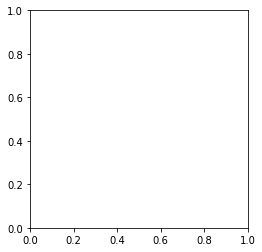

In [13]:
import matplotlib
from matplotlib import pyplot as plt
plt.imshow(cap)

In [9]:
pip install matplotlib

     |████████████████████████████████| 10.3 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 110.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
from functools import partial
from multiprocessing.pool import Pool

In [15]:
def process_video_parallel(url, skip_frames, process_number):
    cap = cv2.VideoCapture(url)
    num_processes = os.cpu_count()
    frames_per_process = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) // num_processes
    cap.set(cv2.CAP_PROP_POS_FRAMES, frames_per_process * process_number)
    x = 0
    count = 0
    while x < 10 and count < frames_per_process:
        ret, frame = cap.read()
        if not ret:
            break
        filename =r"PATH\shot"+str(x)+".png"
        x += 1
        cv2.imwrite(filename.format(count), frame)
        count += skip_frames  # Skip 300 frames i.e. 10 seconds for 30 fps
        cap.set(1, count)
    cap.release()



video_url = "https://www.youtube.com/watch?v=LHBE6Q9XlzI"  # The Youtube URL
ydl_opts = {}
ydl = youtube_dl.YoutubeDL(ydl_opts)
info_dict = ydl.extract_info(video_url, download=False)

formats = info_dict.get('formats', None)

print("Obtaining frames")
for f in formats:
    if f.get('format_note', None) == '144p':
        url = f.get('url', None)
        cpu_count = os.cpu_count()
        with Pool(cpu_count) as pool:
            pool.map(partial(process_video_parallel, url, 300), range(cpu_count))

[youtube] LHBE6Q9XlzI: Downloading webpage
Obtaining frames


[av1 @ 0x560a06940f40] [av1 @ 0x560a06940f40] [av1 @ 0x560a06940f40] [av1 @ 0x560a06940f40] [av1 @ 0x560a06940f40] [av1 @ 0x560a06940f40] Your platform doesn't suppport hardware accelerated AV1 decoding.
Your platform doesn't suppport hardware accelerated AV1 decoding.
Your platform doesn't suppport hardware accelerated AV1 decoding.
Your platform doesn't suppport hardware accelerated AV1 decoding.
Your platform doesn't suppport hardware accelerated AV1 decoding.
[av1 @ 0x560a06940f40] [av1 @ 0x560a06940f40] [av1 @ 0x560a06940f40] [av1 @ 0x560a06940f40] [av1 @ 0x560a06940f40] Failed to get pixel format.
Your platform doesn't suppport hardware accelerated AV1 decoding.
Failed to get pixel format.
Failed to get pixel format.
[av1 @ 0x560a06940f40] [av1 @ 0x560a06940f40] Failed to get pixel format.
Failed to get pixel format.
Your platform doesn't suppport hardware accelerated AV1 decoding.
[av1 @ 0x560a06940f40] Failed to get pixel format.
[av1 @ 0x560a06940f40] Failed to get pixel forma

[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380]

[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380]

[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380]

[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380]

[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380]

[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380] Failed to allocate space for current frame.
[av1 @ 0x560a0689a380] Get current frame error
[av1 @ 0x560a0689a380] video_get_buffer: image parameters invalid
[av1 @ 0x560a0689a380] get_buffer() failed
[av1 @ 0x560a0689a380] thread_get_buffer() failed
[av1 @ 0x560a0689a380]